In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from matplotlib.ticker import FormatStrFormatter

In [2]:
x1 = np.random.rand(10)
x2 = np.random.rand(10)

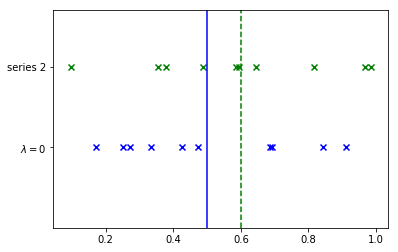

In [30]:
y1 = [1 for _ in range(len(x1))]
y2 = [2 for _ in range(len(x2))]
plt.ylim(bottom=0, top=2.7)
plt.yticks([1, 2], [r"$\lambda = 0$", "series 2"])
plt.scatter(x1, y1, marker='x', c='b')
plt.axvline(x=0.5, c='b')
plt.scatter(x2, y2, marker='x', c='g')
plt.axvline(x=0.6, c='g', linestyle='--')
#plt.grid(True)

In [19]:
def compare_series(x1, x2, name):
    fig, ax = plt.subplots()
    y1 = [1 for _ in range(len(x1))]
    y2 = [2 for _ in range(len(x2))]
    plt.ylim(bottom=0.3, top=2.7)
    plt.xlim(left=0.5, right=0.95)
    #plt.xlim(left=0, right=1)
    plt.yticks([1, 2], [r'$\lambda = 0$', r'$\lambda = 1$'])
    plt.scatter(x1, y1, marker='x', c='b')
    plt.axvline(x=np.median(x1), c='b')
    plt.axvline(x=np.mean(x1), c='b', linestyle='--')
    plt.scatter(x2, y2, marker='x', c='g')
    plt.axvline(x=np.mean(x2), c='g', linestyle='--')
    plt.axvline(x=np.median(x2), c='g')
    plt.xlabel('Mean Feature Agreement')
    ticks = list(plt.xticks()[0])
    plt.xticks([ticks[0], ticks[-1]] + [np.median(x1), np.median(x2)])
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.savefig("{}.pdf".format(name))
    
def compare_multiple_series(values, names, xlabel, figname):
    fig, ax = plt.subplots(figsize=(10, 5))
    colors = iter(plt.cm.tab10(np.linspace(0, 1, 11)))
    n = len(values)
    plt.ylim(bottom=0.3, top=n + 0.7)
    #plt.xlim(left=0.5)
    plt.yticks(list(range(1, n + 1)), names, fontsize=14)
    medians = []
    for i, xs in enumerate(values):
        L = len(xs)
        ys = [i + 1 for _ in range(L)]
        c = next(colors)
        plt.scatter(xs, ys, marker='x', c=c)
        plt.axvline(x=np.median(xs), c=c)
        plt.axvline(x=np.mean(xs), c=c, linestyle='--')
        medians.append(np.median(xs))
        ticks = list(plt.xticks()[0])
    
    plt.xlabel(xlabel, fontsize=14)
    #plt.xticks([ticks[0], ticks[-1]] + medians)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.tight_layout()
    plt.savefig("{}.pdf".format(figname))

In [95]:
folder = '/home/mhoerold/final-thesis/figures/robustness/agreement_tables/'

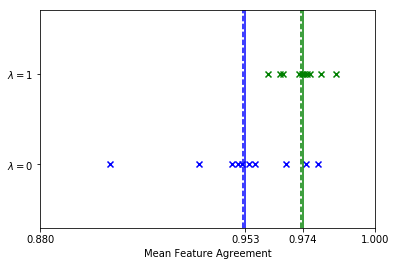

In [96]:
df0 = pd.read_csv(os.path.join(folder, 'lambda_0_test_retest.csv'))
df1 = pd.read_csv(os.path.join(folder, 'lambda_1_test_retest.csv'))
compare_series(df0.Mean, df1.Mean, "test_retest_fig")

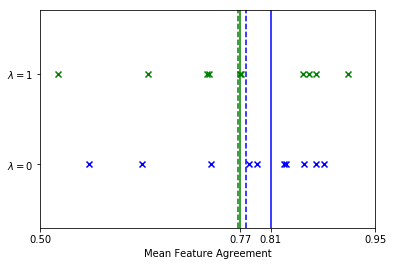

In [115]:
df0 = pd.read_csv(os.path.join(folder, 'lambda_0_same_patient_pairs.csv'))
df1 = pd.read_csv(os.path.join(folder, 'lambda_1_same_patient_pairs.csv'))
compare_series(df0.HCmean, df1.HCmean, "hc_same_patient_fig")

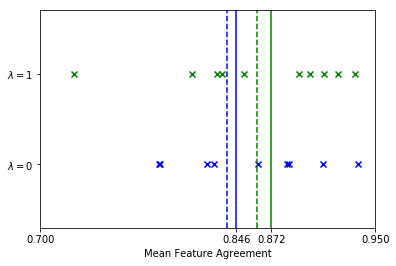

In [111]:
df0 = pd.read_csv(os.path.join(folder, 'lambda_0_same_patient_pairs.csv'))
df1 = pd.read_csv(os.path.join(folder, 'lambda_1_same_patient_pairs.csv'))
compare_series(df0.ADmean, df1.ADmean, "ad_same_patient_fig")

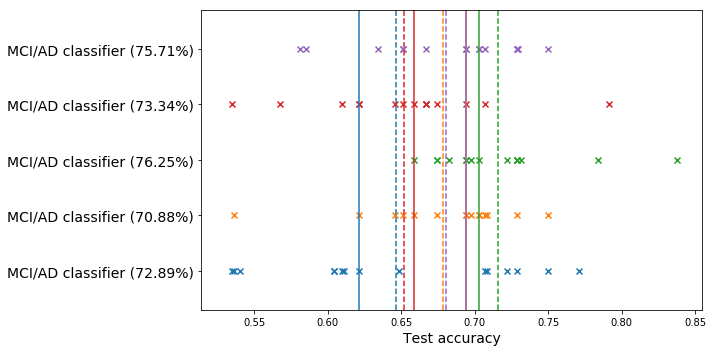

In [39]:
clf_to_label = {
    "20181009-152158_epoch4": 'MCI/AD classifier (75.71%)',
    "20181009-160320_epoch3": 'MCI/AD classifier (73.34%)',
    "20181010-173831_epoch6": 'MCI/AD classifier (76.25%)',
    "20181010-173912_epoch8": 'MCI/AD classifier (70.88%)',
    "20181010-174025_epoch10": 'MCI/AD classifier (72.89%)',
}
train_test = "test"
df = pd.read_csv('/home/mhoerold/entrack/best_gan_mci_ad_clfs.csv')
df = df.loc[(df['metric'] == '{}_accuracy'.format(train_test)) & (df['method'] == 'thresh_t1')]
clfs = list(df.clf_name)
for i, name in enumerate(clfs):
    if name in clf_to_label:
        clfs[i] = clf_to_label[name]
column_names = ["split_{}".format(i) for i in range(15)]
scores = df[column_names].values
train_test = "T" + train_test[1:]
compare_multiple_series(scores, clfs, '{} accuracy'.format(train_test), 'best_gan_mci_ad_clfs_{}'.format(train_test))

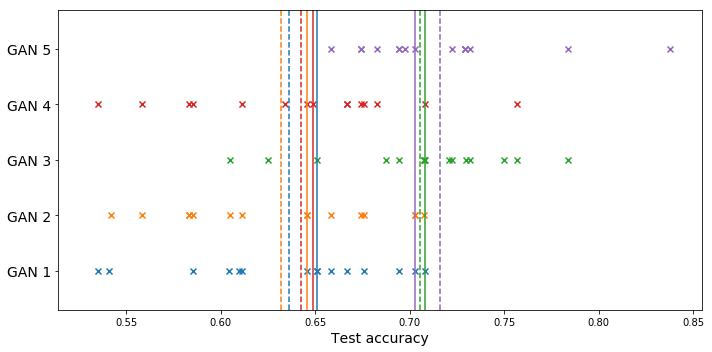

In [41]:
train_test = "test"
df = pd.read_csv('/home/mhoerold/entrack/best_mci_ad_clf_gans.csv')
df = df.loc[(df['metric'] == '{}_accuracy'.format(train_test)) & (df['method'] == 'thresh_t1')]
gans = list(df.gan_name)
gan_to_label = {}
for i, name in enumerate(gans):
    if name in gan_to_label:
        gans[i] = gan_to_label[name]
column_names = ["split_{}".format(i) for i in range(15)]
gans = ["GAN {}".format(i + 1) for i in range(len(gans))]
scores = df[column_names].values
train_test = "T" + train_test[1:]
compare_multiple_series(scores, gans, '{} accuracy'.format(train_test), 'best_mci_ad_clf_gans_{}'.format(train_test))

In [42]:
df

,method,clf_name,gan_name,metric,mean,std,median,split_0,split_1,split_2,...,split_6,split_7,split_8,split_9,split_10,split_11,split_12,split_13,split_14,clf_type
25,thresh_t1,20181010-173831_epoch6,20180926-224521,test_accuracy,0.636023,0.052216,0.651163,0.604167,0.651163,0.609756,...,0.534884,0.658537,0.675676,0.694444,0.645833,0.651163,0.585366,0.540541,0.666667,mci_ad
26,thresh_t1,20181010-173831_epoch6,20180926-224511,test_accuracy,0.632041,0.053026,0.645833,0.541667,0.674419,0.707317,...,0.558140,0.658537,0.702703,0.583333,0.645833,0.604651,0.585366,0.702703,0.583333,mci_ad
27,thresh_t1,20181010-173831_epoch6,20180926-222157,test_accuracy,0.705390,0.046613,0.708333,0.687500,0.651163,0.707317,...,0.720930,0.731707,0.729730,0.722222,0.708333,0.604651,0.707317,0.756757,0.750000,mci_ad
28,thresh_t1,20181010-173831_epoch6,20180926-180536,test_accuracy,0.642194,0.057082,0.648649,0.645833,0.674419,0.585366,...,0.534884,0.682927,0.675676,0.583333,0.666667,0.558140,0.634146,0.648649,0.666667,mci_ad
29,thresh_t1,20181010-173831_epoch6,20180926-103515,test_accuracy,0.716175,0.044377,0.702703,0.729167,0.674419,0.731707,...,0.674419,0.658537,0.837838,0.722222,0.729167,0.697674,0.682927,0.702703,0.694444,mci_ad
